<a href="https://colab.research.google.com/github/Alex-Chen1121/Machine-learning/blob/main/6_29_Cluster_Kmeans_%E9%B3%B6%E5%B0%BE%E8%8A%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 取得分析資料集 鳶尾花
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df= pd.DataFrame(iris["data"], columns=iris["feature_names"])
# x=df.drop([0,1],axis=0)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
import numpy as np
x= np.array(df)
print(x.shape) # 150筆資料 4個特徵欄位

(150, 4)


In [ ]:
# 將資料標準化 變成0~1之間
# 減少數值分布大小不同所帶來的計算誤差
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)
pd.DataFrame(x_scale)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [ ]:
# Kmeans分群:每個點離自己的群越近越好 離別的群越大越好
from sklearn.cluster import KMeans
cluster= KMeans(n_clusters=3)
# ! x_scaled
cluster.fit(x)  #fit訓練(資料)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
#依照中心點分群後 再標上編號
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
# 分群中心點
cluster.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


# 若不知道k該是多少 運用silhouette_score來評估分群的好壞
# silhouette_score = 1-親近程度/疏遠程度
plotx=[]
ploty=[]
for k in range(2,10):
  test_cluster=KMeans(n_clusters=k, n_init="auto") # init選擇起始點
  test_cluster.fit(x)
  score= silhouette_score(x, test_cluster.labels_)
  plotx.append(k)
  ploty.append(score)
print("k群",plotx)
print("score",ploty)

k群 [2, 3, 4, 5, 6, 7, 8, 9]
score [0.6810461692117462, 0.551191604619592, 0.49805050499728737, 0.37228234473251604, 0.33571633019566255, 0.3452178646369998, 0.31240426733172666, 0.320789804237909]


畫圖基礎 matplotlib

Text(0, 0.5, 'score')

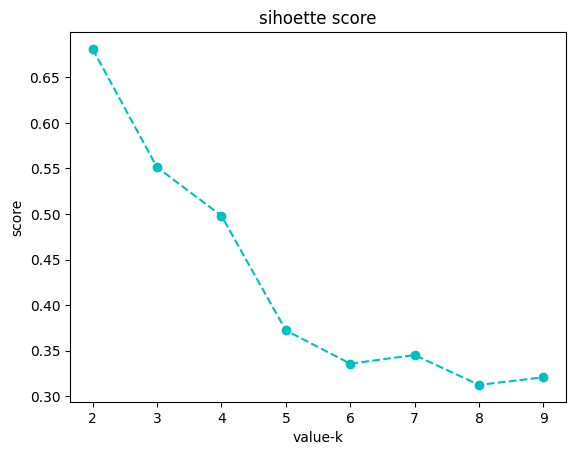

In [ ]:
import matplotlib.pyplot as plt
#只有notebook可以使用的指令
#用來取代plt.show()
%matplotlib inline

plt.plot(plotx,ploty,"co--")
plt.title("sihoette score")
plt.xlabel("value-k")
plt.ylabel("score")
# plt.show()


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

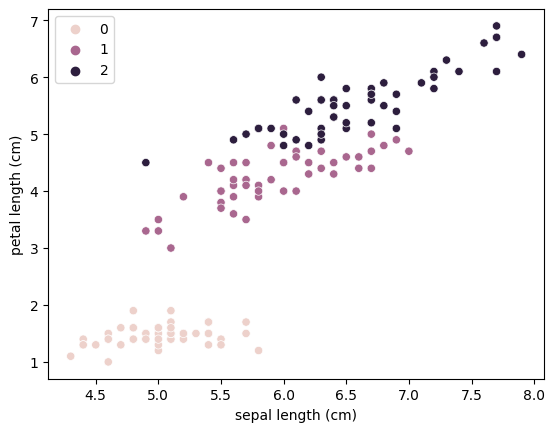

In [ ]:
# 使用seaborn 畫出散點圖 觀察資料分群的情況
import matplotlib.pyplot as plt
import seaborn as sns
# xs=df["sepal length (cm)"]
# ys=df["petal length (cm)"]
# sns.scatterplot(x=xs, y=ys)
sns.scatterplot(data=df,
        x="sepal length (cm)",
        y="petal length (cm)",
        hue=iris["target"]) # hue額外增加資訊 標註不同顏色

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

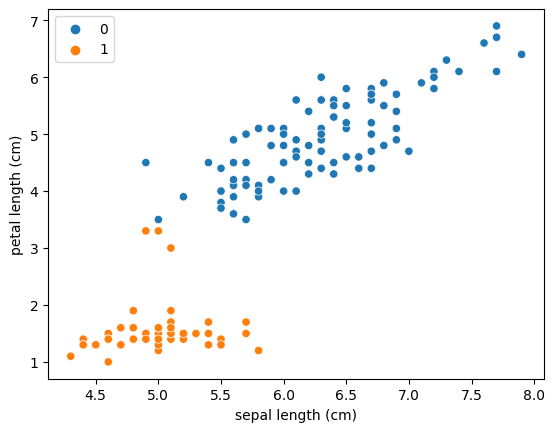

In [ ]:
# 分兩群的情況
cluster = KMeans(n_clusters=2)
cluster.fit(x)
plot2 = sns.scatterplot(data=df,
        x="sepal length (cm)",
        y="petal length (cm)",
        hue=cluster.labels_)
plot2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


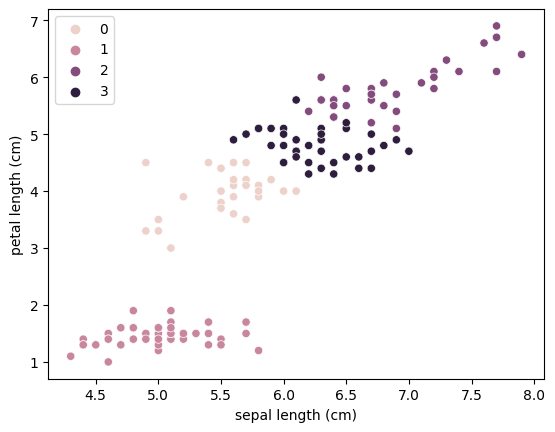

In [ ]:
cluster = KMeans(n_clusters=4)
cluster.fit(x)
plot4 = sns.scatterplot(data=df,
        x="sepal length (cm)",
        y="petal length (cm)",
        hue=cluster.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


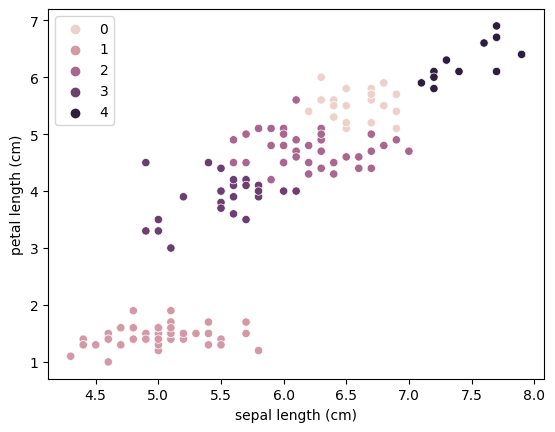

In [ ]:
cluster = KMeans(n_clusters=5)
cluster.fit(x)
plot5 = sns.scatterplot(data=df,
        x="sepal length (cm)",
        y="petal length (cm)",
        hue=cluster.labels_)

In [ ]:
# 要能夠確實且完整的說明你的統計概念以及作法的理由 這才有意義

做分類或分群 可以使用PCA降維 將資料降成2D平面並畫出散點圖 來判斷此資料好不好做
